# Fuel Analysis

## Business Understanding (Objective & Requirements)

The aim of this project is:
 - To explore, understand, and extract actionable insights from vehicle data to inform decisions about fuel efficiency and emissions — both for manufacturers and policy-makers
 - To predict vehicle CO2 emissions based on vehicle features 
 - Identify key factors affecting fuel efficiency

Descriptive Analysis
To get familiar with the dataset — its structure, the variables, and basic statistics. – Do general exploration.

Uncover how different variables relate to one another.

1.	What is the distribution of engine sizes in the dataset? 
2.	Which vehicle class has the highest average fuel consumption (combined)?
3.	What is the average CO2 emission per fuel type?
4.	How does the number of cylinders relate to fuel consumption or CO2 emissions?

Comparative Analysis

5.	Compare the fuel efficiency (combined MPG) between automatic and manual transmissions. Is there a significant difference?
6.	Which manufacturer (MAKE) has the lowest average CO2 emissions across their vehicles?
7.	Are there noticeable differences in fuel consumption between different vehicle classes like 'SUV' vs 'Compact'?

Correlation and Relationships

8.	Is there a correlation between engine size and CO2 emissions?
9.	What is the relationship between fuel consumption in the city and on the highway?
10.	Does a higher number of cylinders consistently lead to higher CO2 emissions?


In [2]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


## General Data Exploration

### Reading the data

In [3]:
# loading the data
fuel = pd.read_csv('FuelConsumption.csv')


### Descriptive Analysis

In [4]:
# check the top of the dataset
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# tail of the data
fuel.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [6]:
# number of rows and columns
rows, cols = fuel.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {cols}")

Number of Rows : 1067 
Number of Columns : 13


In [7]:
# datatypes of the columns
fuel.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

Numeric columns: MODELYEAR, ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB, FUELCONSUMPTION_COMB_MPG, CO2EMISSIONS

Non-Numeric columns : MAKE, MODEL, VEHICLECLASS, TRANSMISSION, FUELTYPE

In [8]:
# general information about the data
fuel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [9]:
# check for missing data
fuel.isnull().sum()

# no missing data present

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [10]:
# check for duplicates
fuel.duplicated().sum()

# no duplicate rows as well

np.int64(0)

### Summary Statistics

In [11]:
# summary statistics for numeric columns 
fuel.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
# mean of the numeric columns
fuel[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']].mean()


ENGINESIZE                    3.346298
CYLINDERS                     5.794752
FUELCONSUMPTION_CITY         13.296532
FUELCONSUMPTION_HWY           9.474602
FUELCONSUMPTION_COMB         11.580881
FUELCONSUMPTION_COMB_MPG     26.441425
CO2EMISSIONS                256.228679
dtype: float64

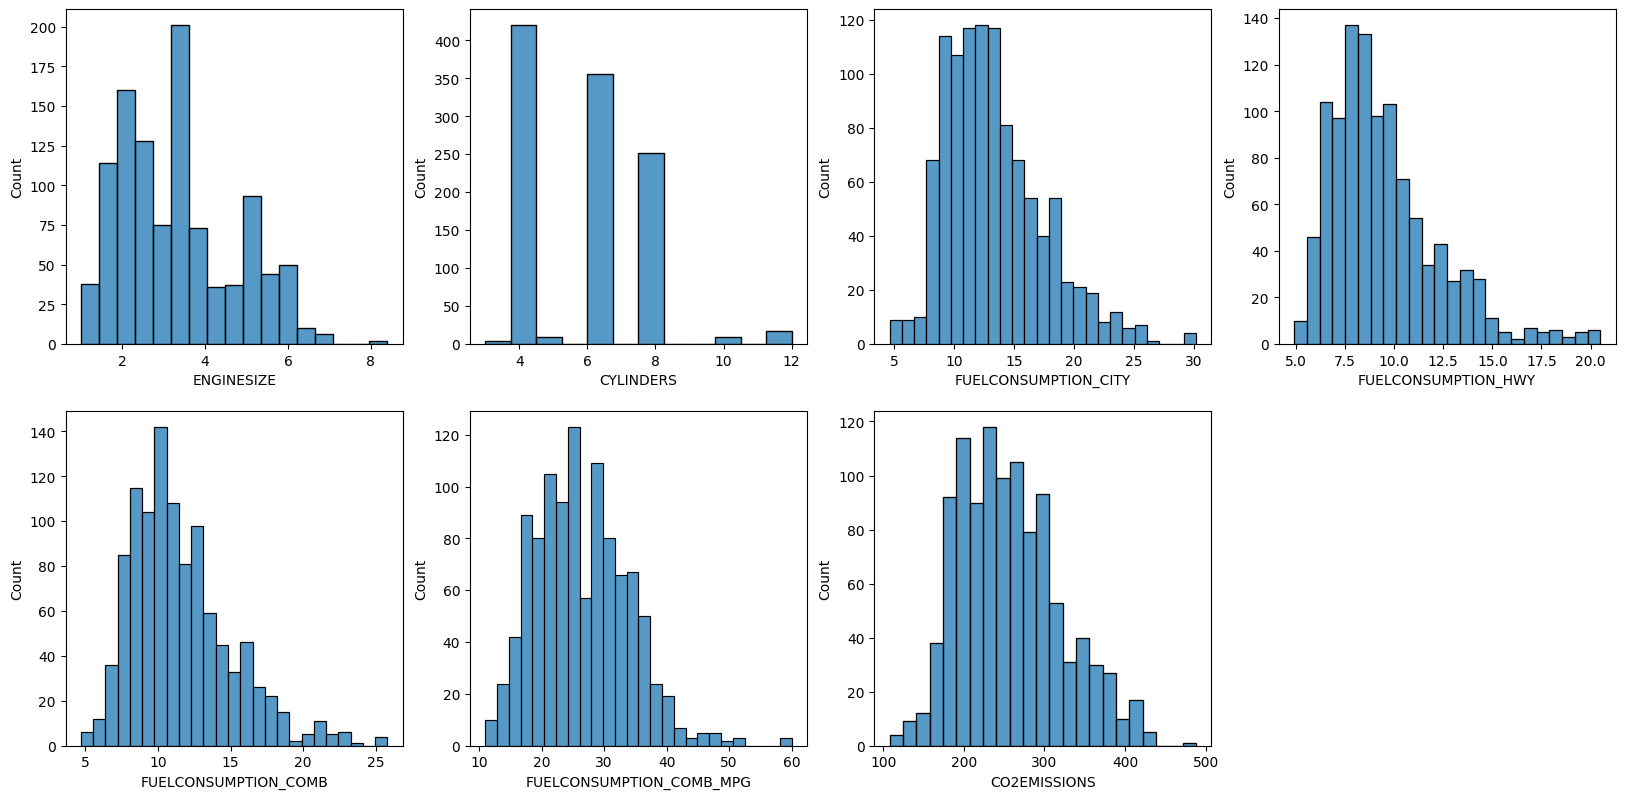

In [13]:
# check the distributions of the numeric columns

# get numeric columns into a dictionary
column_dict = {'ENGINESIZE':1, 'CYLINDERS':2, 'FUELCONSUMPTION_CITY':3, 'FUELCONSUMPTION_HWY':4, 'FUELCONSUMPTION_COMB':5, 'FUELCONSUMPTION_COMB_MPG':6, 'CO2EMISSIONS':7}

# plot histograms 
plt.figure(figsize=(20,20))
for column, i in column_dict.items():
    plt.subplot(4,4,i)
    sns.histplot(fuel[column])

plt.show()

**What is the distribution of engine sizes in the dataset?**
1. Engine size
> - slightly skewed to the right with fewer vehicles having bigger engine size(6-8)
>  - Most vehicles have engine size between 2 and 4. 

2. Most vehicles have 4, 6, or 8 cylinders. Few have 10 or 12(powerful/luxury cars)
3. Fuel consumption in the city is also slightly skewed to the right with most vehicles consuming between 10-15ltrs/km. 
> - Fewer cars have higher consumption
4. Fuel consumption in the highway follows a similar pattern - slightly skewed to the right and with most vehicles consuming lower than in the city (7-12l) 
5. Combined fuel consumption is also similar - slightly skewed to the right with most vehicles consuming 10-15l
6. Combined fuel consumption mpg - shows car's efficiency - shows average fuel efficiency of a ca across both city and highway driving conditions. Higher is better
> - most cars here peak between 20-35mpg
7. Most vehicles emit between 150 - 350g/km of CO2 with a few emitting above 400g/km(likely supercars)
  

In [15]:
# get non-numeric columns and their value_counts
column_dict2 = {'MODELYEAR':1, 'MAKE':2, 'MODEL':3, 'VEHICLECLASS':4, 'TRANSMISSION':5, 'FUELTYPE':6}

for col, i in column_dict2.items():
    print(fuel[col].value_counts())


MODELYEAR
2014    1067
Name: count, dtype: int64
MAKE
FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: count, dtype: int64
MODEL
F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6

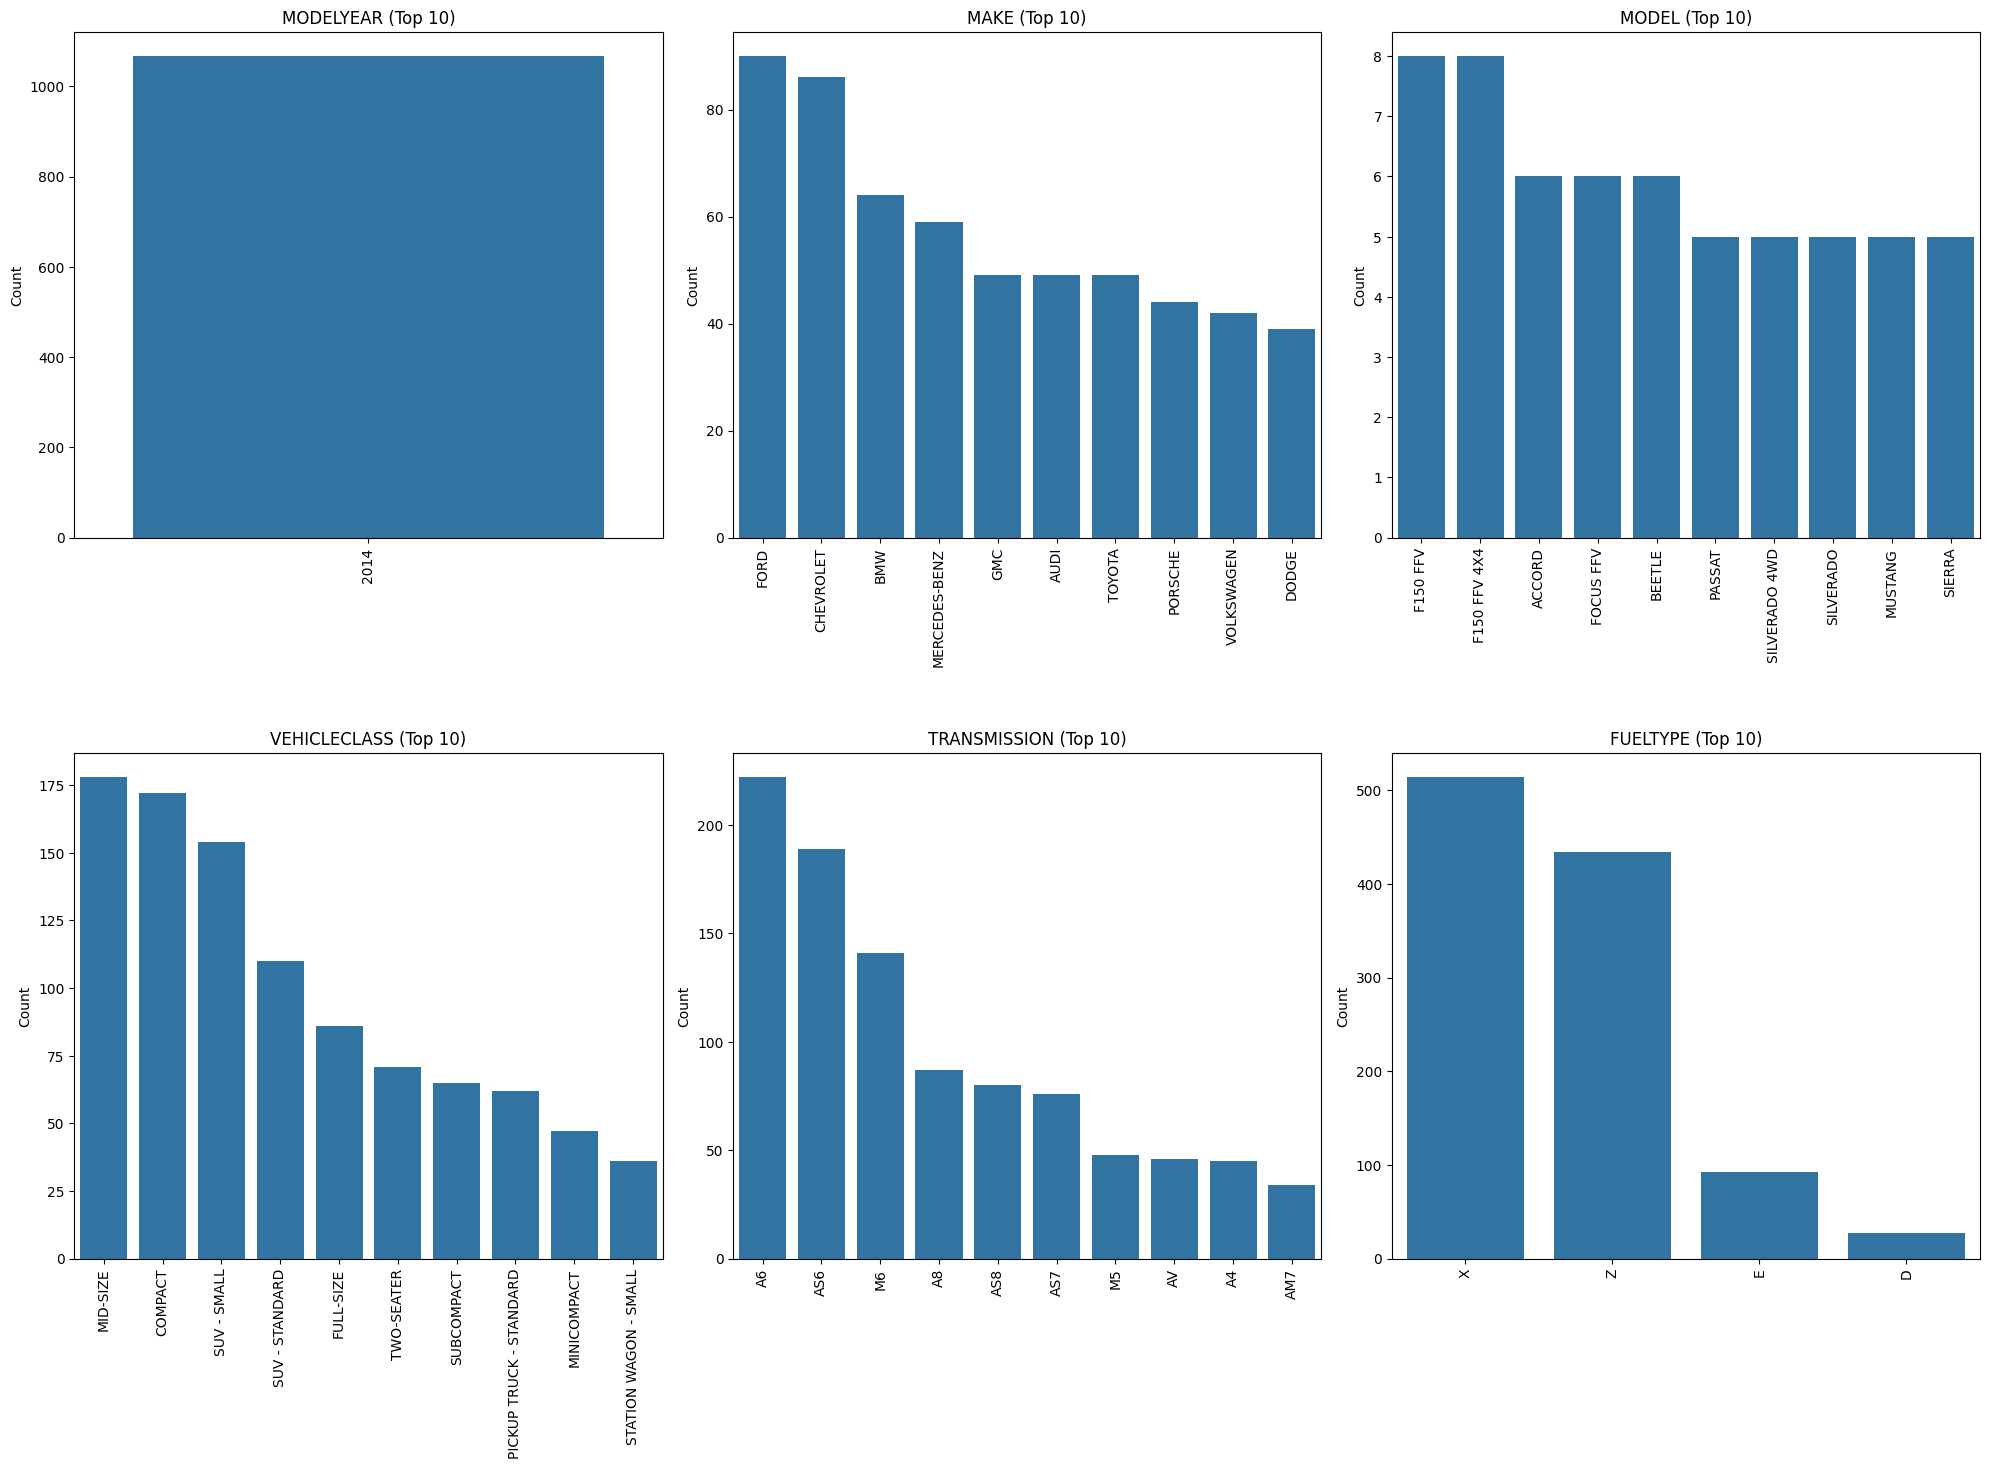

In [16]:
# list categorical columns
cat_cols = list(column_dict2.keys())

# plot the distribution
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    top_cats = fuel[col].value_counts().nlargest(10)
    sns.barplot(x=top_cats.index, y=top_cats.values)
    plt.title(f"{col} (Top 10)")
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.xlabel("")
plt.tight_layout()
plt.show()


- All vehicles are from the year 2014
- FORD, CHEVROLET, BMW are the top 3 vehicle make
- F150 FFV, F150 FFV 4X4, ACCORD are the top 3 vehicle models
- MID-SIZE, COMPACT, SUV-SMALL are the top 3 vehicle classes
- A6, AS6, M6 are the top transmitters
- There are only 4 types of fuel with X being the top


**Which vehicle class has the highest average fuel consumption (combined)**

In [20]:
# group by vehicle class then get the average fuel consumption(combined), then sort in descending order
print(fuel.groupby('VEHICLECLASS')['FUELCONSUMPTION_COMB'].mean().sort_values(ascending=False))


VEHICLECLASS
VAN - PASSENGER             20.328000
VAN - CARGO                 18.718182
PICKUP TRUCK - STANDARD     14.956452
SUV - STANDARD              14.530909
MINIVAN                     12.385714
PICKUP TRUCK - SMALL        12.358333
FULL-SIZE                   12.159302
TWO-SEATER                  11.552113
SUBCOMPACT                  10.981538
SUV - SMALL                 10.696104
STATION WAGON - MID-SIZE    10.250000
MINICOMPACT                 10.242553
SPECIAL PURPOSE VEHICLE     10.228571
MID-SIZE                     9.942697
STATION WAGON - SMALL        9.513889
COMPACT                      9.509884
Name: FUELCONSUMPTION_COMB, dtype: float64


VAN - PASSENGER is the vehicle class with the highest average fuel consumption (combined)

**What is the average CO2 emission per fuel type?**

In [23]:
print(fuel.groupby('FUELTYPE')['CO2EMISSIONS'].mean())


FUELTYPE
D    227.777778
E    291.086957
X    241.097276
Z    268.529954
Name: CO2EMISSIONS, dtype: float64


**How does the number of cylinders relate to fuel consumption or CO2 emissions**

In [26]:
print(fuel.groupby('CYLINDERS')[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].mean())


           FUELCONSUMPTION_COMB  CO2EMISSIONS
CYLINDERS                                    
3                      6.300000    144.750000
4                      8.744048    201.107143
5                      9.744444    223.888889
6                     11.799157    260.603933
8                     15.631349    331.869048
10                    17.166667    394.777778
12                    16.311765    375.176471


As the number of cylinders increase, so does the average fuel consumption (combined) and similarly the co2 emissions also increase. 

### Comparative analysis

**Compare the fuel efficiency (combined MPG) between automatic and manual transmissions. Is there a significant difference?**

In [ ]:
fuel.TRANSMISSION.value_counts()

TRANSMISSION
A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: count, dtype: int64

In [ ]:
# create new column with transmission type
def transmission_type(transmission):
    if 'A' in transmission:
        return 'Automatic'
    elif 'M' in transmission:
        return 'Manual'
    else:
        return 'Other'
    
fuel['TRANSMISSION_TYPE'] = fuel['TRANSMISSION'].apply(transmission_type)
fuel[['TRANSMISSION', 'TRANSMISSION_TYPE']].head(10)

,TRANSMISSION,TRANSMISSION_TYPE
0,AS5,Automatic
1,M6,Manual
2,AV7,Automatic
3,AS6,Automatic
4,AS6,Automatic
5,AS6,Automatic
6,AS6,Automatic
7,AS6,Automatic
8,M6,Manual
9,AS5,Automatic


In [ ]:
# check average combined fuel consumption between both types of vehicles
print(fuel.groupby('TRANSMISSION_TYPE')['FUELCONSUMPTION_COMB_MPG'].describe())


                   count       mean       std   min   25%   50%   75%   max
TRANSMISSION_TYPE                                                          
Automatic          869.0  25.608746  7.433187  11.0  20.0  25.0  30.0  60.0
Manual             198.0  30.095960  6.474149  16.0  26.0  30.0  35.0  44.0


There is a slight difference in the average combined fuel consumption with the mean of automatic vehicles being slightly lower than manual vehicles

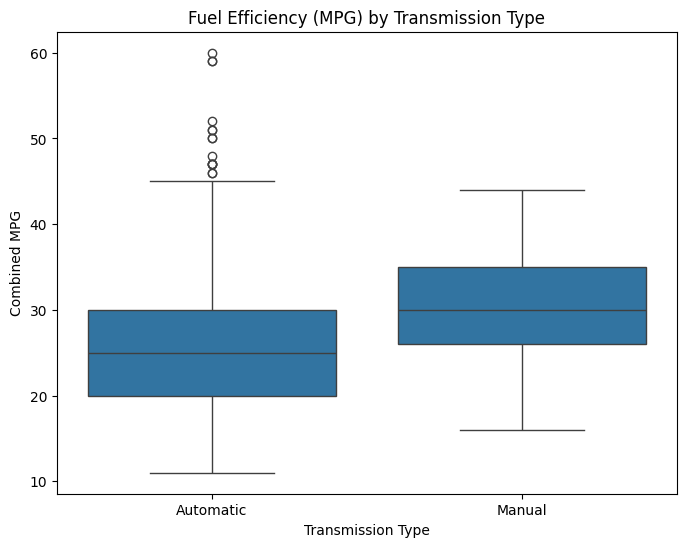

In [ ]:
# compare if there is a difference in fuel efficiency between manual and automatic vehicles
plt.figure(figsize=(8, 6))
sns.boxplot(x='TRANSMISSION_TYPE', y='FUELCONSUMPTION_COMB_MPG', data=fuel)
plt.title('Fuel Efficiency (MPG) by Transmission Type')
plt.ylabel('Combined MPG')
plt.xlabel('Transmission Type')
plt.show()

Just as seen in the averages, the Automatic vehicles consume slightly lower fuel than Manual vehicles

In [ ]:
from scipy.stats import ttest_ind

# Filter automatic and manual groups
auto_mpg = fuel[fuel['TRANSMISSION_TYPE'] == 'Automatic']['FUELCONSUMPTION_COMB_MPG']
manual_mpg = fuel[fuel['TRANSMISSION_TYPE'] == 'Manual']['FUELCONSUMPTION_COMB_MPG']

# Perform independent t-test
t_stat, p_value = ttest_ind(auto_mpg, manual_mpg, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ There is a statistically significant difference in MPG between automatic and manual transmissions.")
else:
    print("⚠️ No statistically significant difference in MPG between automatic and manual transmissions.")


T-statistic: -8.553
P-value: 0.0000
✅ There is a statistically significant difference in MPG between automatic and manual transmissions.


**Which manufacturer (MAKE) has the lowest average CO2 emissions across their vehicles?**

In [ ]:
# group by the make, get the mean co2 emissions, then get the make with the lowest emission
print(fuel.groupby('MAKE')['CO2EMISSIONS'].mean().sort_values())


MAKE
SMART            147.000000
FIAT             179.500000
MINI             188.527778
MAZDA            193.037037
SCION            198.888889
HONDA            203.714286
MITSUBISHI       210.500000
VOLKSWAGEN       216.000000
HYUNDAI          217.250000
KIA              217.515152
SUBARU           225.130435
ACURA            226.000000
TOYOTA           235.183673
BUICK            235.687500
LEXUS            246.500000
DODGE            249.589744
CHRYSLER         251.368421
NISSAN           251.393939
JEEP             251.774194
BMW              252.109375
INFINITI         256.761905
VOLVO            257.818182
PORSCHE          258.840909
FORD             265.955556
LINCOLN          268.181818
CHEVROLET        272.930233
AUDI             275.693878
MERCEDES-BENZ    277.677966
CADILLAC         287.343750
JAGUAR           290.681818
RAM              291.230769
LAND ROVER       307.842105
MASERATI         319.666667
GMC              328.244898
ASTON MARTIN     351.571429
BENTLEY        

SMART vehicles are seen to emit the least amount of co2 to the environment

**Are there noticeable differences in fuel consumption between different vehicle classes like 'SUV' vs 'Compact'?**

In [ ]:
fuel.VEHICLECLASS.value_counts()

VEHICLECLASS
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: count, dtype: int64

In [ ]:
# subset the vehicle classes
suv_compact = ['COMPACT', 'SUV - SMALL', 'SUV - STANDARD', 'SUBCOMPACT', 'MINICOMPACT']
subset = fuel[fuel['VEHICLECLASS'].isin(suv_compact)]
subset.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,TRANSMISSION_TYPE
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,Automatic
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,Manual
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,Automatic
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,Automatic
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,Automatic


In [ ]:
# group by the vehicle class, get the summary statistics of combined fuel consumption
print(subset.groupby('VEHICLECLASS')['FUELCONSUMPTION_COMB'].describe())


                count       mean       std  min   25%    50%     75%   max
VEHICLECLASS                                                              
COMPACT         172.0   9.509884  2.218915  4.7   8.0   9.05  10.400  17.1
MINICOMPACT      47.0  10.242553  2.290030  6.2   8.0  10.60  11.550  15.6
SUBCOMPACT       65.0  10.981538  2.578935  6.6   9.3  10.60  12.700  16.5
SUV - SMALL     154.0  10.696104  1.764052  7.7   9.4  10.55  11.500  17.0
SUV - STANDARD  110.0  14.530909  3.104857  8.2  12.3  13.90  16.075  22.1


COMPACT class consumes less fuel(9.51) compared to the SUV-SMALL(10.70) and SUV-STANDARD(14.53). 

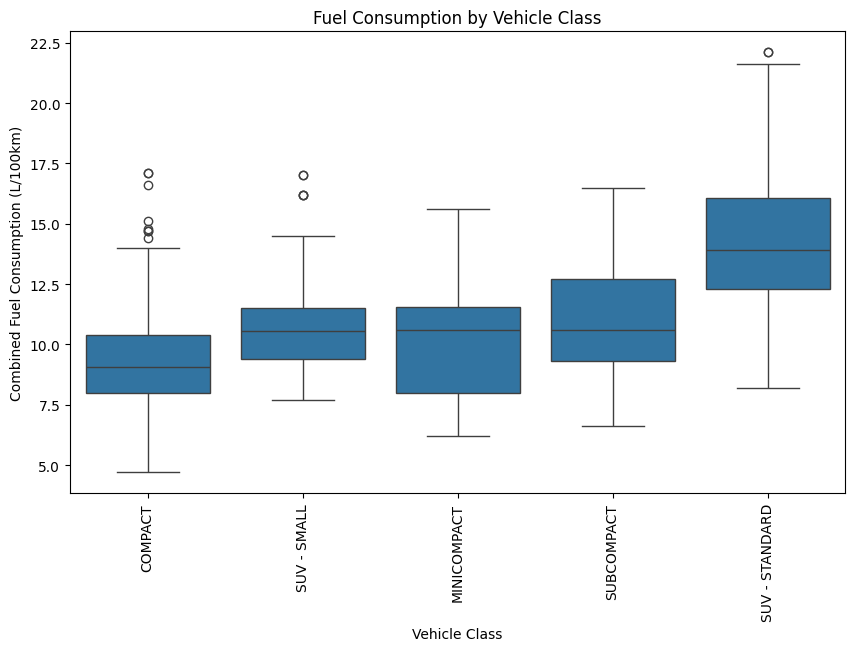

In [ ]:
# plot boxplots

plt.figure(figsize=(10, 6))
sns.boxplot(x='VEHICLECLASS', y='FUELCONSUMPTION_COMB', data=subset)
plt.title('Fuel Consumption by Vehicle Class')
plt.ylabel('Combined Fuel Consumption (L/100km)')
plt.xlabel('Vehicle Class')
plt.xticks(rotation=90)
plt.show()


SUVs generally consume more fuel than COMPACT cars - they have bigger engines and more weight hence more consumption

### Correlation and Relationships

**Is there a correlation between engine size and CO2 emissions?**

In [ ]:
fuel[['ENGINESIZE', 'CO2EMISSIONS']].corr()

,ENGINESIZE,CO2EMISSIONS
ENGINESIZE,1.000000,0.874154
CO2EMISSIONS,0.874154,1.000000


There is a strong positive correlation(0.874) between the engine size and co2 emissions -> suggests that  vehicles with bigger engines emit more co2

**What is the relationship between fuel consumption in the city and on the highway?**

In [ ]:
fuel[['FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']].corr()


,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
FUELCONSUMPTION_CITY,1.000000,0.965718
FUELCONSUMPTION_HWY,0.965718,1.000000


There is a strong positive linear relationship(0.9657) between fuel consumption in the city and highway -> this is expected because vehicles that consume lower fuel in the city will also consume lower fuel in the highway because there are fewer stops along the highways

**Does a higher number of cylinders consistently lead to higher CO2 emissions?**

In [ ]:
fuel[['CYLINDERS', 'CO2EMISSIONS']].corr()

,CYLINDERS,CO2EMISSIONS
CYLINDERS,1.000000,0.849685
CO2EMISSIONS,0.849685,1.000000


A strong positive correlation of 0.8497 suggests that the amount of co2 emission increases as the number of cylinders increases

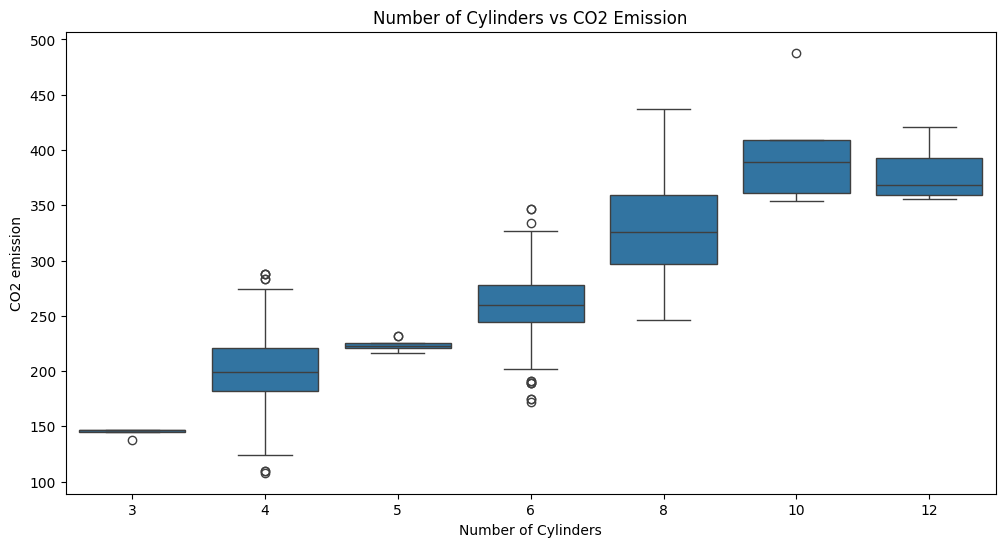

In [ ]:
# make boxplot to check the same
plt.figure(figsize=(12,6))
sns.boxplot(x='CYLINDERS', y='CO2EMISSIONS', data=fuel)
plt.title('Number of Cylinders vs CO2 Emission')
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 emission')
plt.show()

More cylinders lead to higher CO₂ emissions, since more cylinders mean larger engines and more fuel burned.